In [7]:
# text classification

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

df = pd.read_csv(r"C:\Users\Vaibhav\OneDrive\Documents\FolderPython\Artificial_Intelligence\Natural_Language_Processing\Nlp_revision\TextFiles\smsspamcollection.tsv",sep='\t')
print(df)
df.head()
df.isnull().sum() # here the sum is 0 so no null


     label                                            message  length  punct
0      ham  Go until jurong point, crazy.. Available only ...     111      9
1      ham                      Ok lar... Joking wif u oni...      29      6
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155      6
3      ham  U dun say so early hor... U c already then say...      49      6
4      ham  Nah I don't think he goes to usf, he lives aro...      61      2
...    ...                                                ...     ...    ...
5567  spam  This is the 2nd time we have tried 2 contact u...     160      8
5568   ham               Will ü b going to esplanade fr home?      36      1
5569   ham  Pity, * was in mood for that. So...any other s...      57      7
5570   ham  The guy did some bitching but I acted like i'd...     125      1
5571   ham                         Rofl. Its true to its name      26      1

[5572 rows x 4 columns]


label      0
message    0
length     0
punct      0
dtype: int64

In [8]:
df['label']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [9]:
print(df['label'].unique())
print(df['label'].value_counts)

['ham' 'spam']
<bound method IndexOpsMixin.value_counts of 0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object>


(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,
          1.,   0.,   1.,   4.,   3.,  10.,   2.,   6.,  17.,  13.,  17.,
         47.,  69., 259., 290.,   5.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.]),
 array([  1.        ,   1.15      ,   1.3225    ,   1.520875  ,
          1.74900625,   2.01135719,   2.31306077,   2.66001988,
          3.05902286,   3.51787629,   4.04555774,   4.6523914 ,
          5.35025011,   6.15278762,   7.07570576,   8.13706163,
          9.35762087,  10.761264  ,  12.37545361,  14.23177165,
         16.36653739,  18.821518  ,  21.6447457 ,  24.89145756,
         28.62517619,  32.91895262,  37.85679551,  43.53531484,
         50.06561207,  57.57545388,  66.21177196,  76.14353775,
         87.56506841, 100.69982867, 115.80480298, 133.17552342,
        153.15185194, 176.12462973, 202.54332419, 232.92482281,
        267.86354623, 30

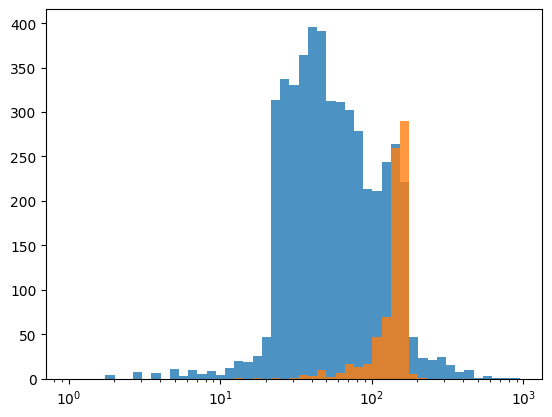

In [11]:
import matplotlib.pyplot as plt

plt.xscale('log')
bins = 1.15**(np.arange(0,50))

plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

X = df[['length','punct']]
y = df['label']

scaler = StandardScaler()
scaler.fit_transform(X)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

lr_model = LogisticRegression(solver='lbfgs')
lr_model.fit(x_train,y_train)

y_pred = lr_model.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
print(acc_score)


0.8492822966507177


In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# nb_model = MultinomialNB()
nb_model = RandomForestClassifier() # best working
nb_model.fit(x_train,y_train)

y_pred = nb_model.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
print(acc_score)
print(confusion_matrix(y_pred,y_test))

0.8935406698564593
[[1377   98]
 [  80  117]]


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

messages = ['Hey, lets go to the game today!',
            "Call your sister.",
            "Want to go walk your dogs?"]

vect = TfidfVectorizer()

dtm = vect.fit_transform(messages)
print(dtm)
vect.get_feature_names_out()

  (0, 9)	0.40301621080355077
  (0, 2)	0.40301621080355077
  (0, 7)	0.40301621080355077
  (0, 8)	0.3065042162415877
  (0, 3)	0.3065042162415877
  (0, 5)	0.40301621080355077
  (0, 4)	0.40301621080355077
  (1, 6)	0.6227660078332259
  (1, 12)	0.4736296010332684
  (1, 0)	0.6227660078332259
  (2, 1)	0.45954803293870056
  (2, 10)	0.45954803293870056
  (2, 11)	0.45954803293870056
  (2, 12)	0.3494981241087058
  (2, 8)	0.3494981241087058
  (2, 3)	0.3494981241087058


array(['call', 'dogs', 'game', 'go', 'hey', 'lets', 'sister', 'the', 'to',
       'today', 'walk', 'want', 'your'], dtype=object)

In [33]:
vocab = {}
i = 1

with open(r'C:\Users\Vaibhav\OneDrive\Documents\FolderPython\Artificial_Intelligence\Natural_Language_Processing\Nlp_revision\03-Text-Classification\1.txt') as f:
    x = f.read().lower().split()

for word in x:
    if word not in vocab:
        vocab[word] = i
        i += 1

print(vocab)

# Create an empty vector with space for each word in the vocabulary:
one = ['1.txt'] + [0] * len(vocab)
print(one)  # This is an empty vector, now we will map them to the vector

with open(r'C:\Users\Vaibhav\OneDrive\Documents\FolderPython\Artificial_Intelligence\Natural_Language_Processing\Nlp_revision\03-Text-Classification\1.txt') as f:
    x = f.read().lower().split()

for word in x:
    one[vocab[word]] += 1

print(one)

# Create an empty vector for the second file
two = ['2.txt'] + [0] * len(vocab)

# Use the correct path to open the second file
with open(r"..\03-Text-Classification\2.txt") as f:
    x = f.read().lower().split()

for word in x:
    if word in vocab:  # Ensure the word exists in the vocabulary before updating
        two[vocab[word]] += 1

print(two)

{'this': 1, 'is': 2, 'a': 3, 'story': 4, 'about': 5, 'cats': 6, 'our': 7, 'feline': 8, 'pets': 9, 'are': 10, 'furry': 11, 'animals': 12}
['1.txt', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['1.txt', 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]
['2.txt', 1, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]


In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv(r'C:\Users\Vaibhav\OneDrive\Documents\FolderPython\Artificial_Intelligence\Natural_Language_Processing\Nlp_revision\TextFiles\smsspamcollection.tsv',sep='\t')

print(df.head())
print('\n')
print(df.isnull().sum())
print('\n')
print(df['label'].value_counts)

x = df['message']
y = df['label']


  label                                            message  length  punct
0   ham  Go until jurong point, crazy.. Available only ...     111      9
1   ham                      Ok lar... Joking wif u oni...      29      6
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155      6
3   ham  U dun say so early hor... U c already then say...      49      6
4   ham  Nah I don't think he goes to usf, he lives aro...      61      2


label      0
message    0
length     0
punct      0
dtype: int64


<bound method IndexOpsMixin.value_counts of 0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object>


In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# count_vect = CountVectorizer()

# x_train_counts = count_vect.fit_transform(x_train)
# print('\n')
# print(x_train_counts)  # the size is of 4457*7702

# print(x_train.shape)
# print(x_train_counts.shape)



  (0, 4105)	1
  (0, 5332)	1
  (0, 5025)	1
  (0, 4586)	1
  (0, 6987)	1
  (0, 957)	1
  (0, 1585)	1
  (0, 1562)	1
  (0, 4909)	1
  (0, 4240)	1
  (0, 6933)	1
  (0, 3609)	1
  (0, 7455)	1
  (0, 7565)	1
  (0, 3127)	2
  (0, 4271)	2
  (0, 3267)	2
  (0, 2192)	1
  (1, 3609)	1
  (1, 4680)	1
  (1, 3525)	1
  (1, 3422)	1
  (1, 6247)	1
  (1, 5563)	1
  (1, 2166)	1
  :	:
  (4454, 2818)	1
  (4455, 2951)	1
  (4455, 6108)	1
  (4455, 3652)	1
  (4455, 7497)	1
  (4455, 1346)	1
  (4455, 6673)	1
  (4456, 3609)	2
  (4456, 4992)	1
  (4456, 6734)	1
  (4456, 1662)	1
  (4456, 6798)	1
  (4456, 4423)	5
  (4456, 7499)	1
  (4456, 4499)	1
  (4456, 1582)	1
  (4456, 2413)	3
  (4456, 5642)	1
  (4456, 4742)	2
  (4456, 945)	1
  (4456, 4523)	1
  (4456, 7559)	1
  (4456, 3569)	1
  (4456, 4769)	1
  (4456, 7678)	1
(4457,)
(4457, 7783)


In [46]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
import joblib

# tfidf_transformer = TfidfTransformer()
# x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
vectorizer = TfidfVectorizer() # combines the process of transformer and countvectorizeer
x_train_tfidf = vectorizer.fit_transform(x_train)

clf = LinearSVC()
clf.fit(x_train_tfidf,y_train)

text_clf = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('clf',LinearSVC())
])

text_clf.fit(x_train,y_train)
y_pred = text_clf.predict(x_test)

print('accuracy score is:',accuracy_score(y_pred,y_test))

pred1 = text_clf.predict(["Hi brother how are you doing"])
pred2 = text_clf.predict(["Get 50 percent discount on sales of products Contact the no 9898989898 for the prize!!!"])

print(pred1,pred2)

joblib.dump(text_clf,'text_classification_model.pkl')

accuracy score is: 0.9811659192825112
['ham'] ['spam']


c:\Users\Vaibhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Vaibhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


['text_classification_model.pkl']

In [59]:
df = pd.read_csv(r'C:\Users\Vaibhav\OneDrive\Documents\FolderPython\Artificial_Intelligence\Natural_Language_Processing\UPDATED_NLP_COURSE\TextFiles\moviereviews.tsv', sep='\t')
df.dropna(axis=0,inplace=True)
print(df.head())
x = df['review']
y = df['label']


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

text_clf = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('clf',LinearSVC())
])

text_clf.fit(x_train,y_train)
y_pred = text_clf.predict(x_test)
print(accuracy_score(y_pred,y_test))
confusion_matrix(y_pred,y_test)

joblib.dump(text_clf,'movie_review_classification.pkl')


  label                                             review
0   neg  how do films like mouse hunt get into theatres...
1   neg  some talented actresses are blessed with a dem...
2   pos  this has been an extraordinary year for austra...
3   pos  according to hollywood movies made in last few...
4   neg  my first press screening of 1998 and already i...
0.8396946564885496


c:\Users\Vaibhav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


['movie_review_classification.pkl']